# Links I used for this project 
- [Make a table in Jupyter](https://stackoverflow.com/questions/35160256/how-do-i-output-lists-as-a-table-in-jupyter-notebook)
- [Crypto Data metrics](https://coinmetrics.io/tools/)
- [Youtube ML tutorial](https://www.youtube.com/watch?v=rAdAVcS4aL0&list=PLQVvvaa0QuDd0flgGphKCej-9jp-QdzZ3&index=4)
- [Predicting Stock Prices using deep learning](https://towardsdatascience.com/getting-rich-quick-with-machine-learning-and-stock-market-predictions-696802da94fe)
- [Moving Average Crossover](https://www.europeanproceedings.com/files/data/article/44/1143/article_44_1143_pdf_100.pdf)
- [Common MAC Periods](https://www.investopedia.com/ask/answers/122414/what-are-most-common-periods-used-creating-moving-average-ma-lines.asp)
- [Algorithmic Financial Trading](https://www.researchgate.net/publication/324802031_Algorithmic_Financial_Trading_with_Deep_Convolutional_Neural_Networks_Time_Series_to_Image_Conversion_Approach)



# Me Navigating My Way Through the World of Data Science

<br/><br/>


<img src="photo/climbing.jpg" width = "60%">


<br/><br/>

### About Me:

I spend a lot of time climbing, playing music, and adventuring, but have started to miss my STEM roots. Machine learning application is something I feel naturally passionate about so I am doing all these projects for fun to discover if its something I want to persue. Please leave any comments and tell me what I need to improve!! Thank you! Also feel free to go critique my github, I could use any feedback I can get.

__email:__ jamorsicato@gmail.com

__github:__ https://github.com/jamorsicato

__Linekdin:__ https://www.linkedin.com/in/jonathan-morsicato-089977196/

__instagram:__ @jonnymorsicato (if you feel like checking out some Colorado mountain adventures)



In [ ]:
# General imports 

import numpy as np 
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score

#
import os
import time
from datetime import datetime 

#Make table for Data Exploration 
from IPython.display import HTML, display
import tabulate

# family imports
## families are a broad type of model
from sklearn.ensemble import RandomForestRegressor

# cross validation tools
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# plotting imports 
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
import matplotlib.cbook as cbook
plt.style.use('seaborn')

# alternative to pickle and save our model for the future
## from sklearn.externals import joblib !!!! This didnt load, maybe we will use pickle at the end to save our model 
import pickle

# Following "Algorithmic Financial trading" 

## Overview 

- __General Workflow__
    - dataset extract/transform, (DONE)
    - labelling data (label all data as buy/sell/hold)
    - image creation,
    - CNN analysis
    - ﬁnancial evaluation phases
- __Goal__: determine best fit for buy/ sell/ and hold positions associated with crypto prices

<img src="photo/algo_trading_flowchart.png" width = "80%">

- __Image Creation:__ 
    - For each day 
    - RSI, Williams %R, WMA, EMA, SMA, HMA,Triple EMA, CCI, CMO, MACD, PPO, ROC, CMFI, DMI, and PSI values
    - Intervals 6 - 20 days 
    - We want oscialtor analysis indicators that we can turn into a signal image 
    - 15x15 image is generated by using 15 technical indicators and 15 diﬀerentintervals of technical indicators
    - Its important that the order of data is unique and cant be changed 
    
- __Labeling__ 
    - (This is NOT how i am gonna do it)“Hold”, “Buy”, or “Sell” by determining the top and bottom points in a sliding window. Bottom points are labeled as “Buy”, top points are labeled as “Sell”, and the remaining points are labeled as “Hold”.
    - make 1 model that uses labeled data off of a simple min max in a sliding window
    - make another training set that uses a min max on an Exponential Moving average.
    
    <img src="photo/btc_buy_sell.png" width = "110%">
    
## Method
- Libraries Used: Apache Spark, Keras and Tensorﬂow

## Workflow

- Where are we gonna get the data? (Do not take data at a very high rate DDOS) (Contact Companies)
- What estimator am i gonna use? (looks like I will use SGD or Linear SVC)
- Technical Analysis or Fundimental Analaysis 
- CNN (Convolutional Neural Network) or LSTM (Long Term Short Memory)
- Organize and decide what metrics are useful
- need to label our data set with a Buy, Hold, and Sell label for every data point
- build training and testing sets 
- pickl and export model
- build app with ML into investing spreadsheet? 



## Goal: Predict tomorrows bitcoin price 

- Input{} Output{price USD}


## Design

- I want this ML algorithm to begin to tell me when to buy and sell crypto. Its important to note tha this is probably not gonna work as this model will be pretty Naive, but i think it would be interesting. We alwasy have access to current and previous data, but we alwasy wish we knew the future. I 

- Inputs 
    - Moving average crossover (time lagged) (NEED TO CALC FROM PRICE)
    - volume (FROM DATA SET)
    - Hash difficulty (FROM DATA SET)
    - Market Cap 
    - Bitcoin Difficulty 
    - Addresses (sum fof unique addresses in the network)
    
- Output 
    - Price
    
   
   
- PricePrediction(i) = {x(i-k),y(i-k),z(i-k),..., etc} __where__ i = current time period, and k = time lag
    
    
## Questions

- why does somehting have value?
- what makes bitcoins price go up or down?
    - price increases when buying pressure goes up
    - regulations on its buy/sell
    - 
    
    
## Notes

- dataset extract/transform, (DONE)
- labelling data (label all data as buy/sell/hold)
- image creation,
- CNN analysis
- ﬁnancial evaluation phases.

- Apache Spark, Keras and Tensorﬂow to create and analyze theimages and perform big data analytics

- Use a sliding window for training and testing (Train: (1-5) + i years Test: 6 + i years)) i = i + 1
    - using the sliding window allows for model refinement by retetsting and retraining



In [3]:
## Load Data For Use into pandas dataframe

# for initial model
df = pd.read_csv("/Users/jonnymorsicato/Desktop/Data Science/machine_learning_practice/data/btc.csv")

# data fram with the definitions for all columns in data set 
df_m = pd.read_csv("/Users/jonnymorsicato/Desktop/Data Science/machine_learning_practice/data/metrics_info.csv")


In [4]:
display(HTML(tabulate.tabulate(df_m, tablefmt='html')))

0,AdrActCnt,"Addresses, active, count",Addresses,Active,Sum,Addresses,1 day,1 block,The sum count of unique addresses that were active in the network (either as a recipient or originator of a ledger change) that interval. All parties in a ledger change action (recipients and originators) are counted. Individual addresses are not double-counted if previously active.
1,BlkCnt,"Block, count",Network Usage,Blocks,Sum,Blocks,1 day,nan,The sum count of blocks created that interval that were included in the main (base) chain.
2,BlkSizeByte,"Block, size, bytes",Network Usage,Blocks,Sum,Bytes,1 day,1 block,The sum of the size (in bytes) of all blocks created that interval.
3,BlkSizeMeanByte,"Block, size, mean, bytes",Network Usage,Blocks,Mean,Bytes,1 day,nan,The mean size (in bytes) of all blocks created that day.
4,CapMVRVCur,"Capitalization, MVRV, current supply",Market,Market Capitalization,Ratio,Dimensionless,1 day,nan,"The ratio of the sum USD value of the current supply to the sum ""realized"" USD value of the current supply."
5,CapMrktCurUSD,"Capitalization, market, current supply, USD",Market,Market Capitalization,Product,USD,1 day,nan,The sum USD value of the current supply. Also referred to as network value or market capitalization.
6,CapRealUSD,"Capitalization, realized, USD",Market,Market Capitalization,Product,USD,1 day,nan,"The sum USD value based on the USD closing price on the day that a native unit last moved (i.e., last transacted) for all native units."
7,DiffMean,"Difficulty, mean",Mining,Difficulty,Mean,Dimensionless,1 day,1 block,"The mean difficulty of finding a hash that meets the protocol-designated requirement (i.e., the difficulty of finding a new block) that interval. The requirement is unique to each applicable cryptocurrency protocol. Difficulty is adjusted periodically by the protocol as a function of how much hashing power is being deployed by miners."
8,FeeMeanNtv,"Fees, transaction, mean, native units",Fees and Revenue,Fees,Mean,Native units,1 day,1 block,The mean fee per transaction in native units that interval.
9,FeeMeanUSD,"Fees, transaction, mean, USD",Fees and Revenue,Fees,Mean,USD,1 day,1 block,The USD value of the mean fee per transaction that interval.
10,FeeMedNtv,"Fees, transaction, median, native units",Fees and Revenue,Fees,Median,Native units,1 day,1 block,The median fee per transaction in native units that interval.


In [5]:
df.tail()

,date,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMVRVCur,CapMrktCurUSD,CapRealUSD,DiffMean,FeeMeanNtv,...,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d
4416,2021-02-05,1257476,169,220967480,1.307500e+06,3.094287,7.084231e+11,2.289455e+11,2.082353e+13,0.000403,...,1.064854e+10,0.606063,23057.905209,0.003946,150.114267,625265.772645,2.378849e+10,0.035133,0.053121,0.046506
4417,2021-02-06,1147256,159,204567178,1.286586e+06,3.184288,7.326001e+11,2.300672e+11,2.140366e+13,0.000346,...,7.549239e+09,0.477582,18788.903641,0.003745,147.334768,439000.129185,1.727102e+10,0.035184,0.051994,0.045997
4418,2021-02-07,1159518,156,217718080,1.395629e+06,3.141200,7.263308e+11,2.312271e+11,2.143440e+13,0.000295,...,6.696322e+09,0.498024,19424.418905,0.003062,119.422933,421592.878721,1.644339e+10,0.035020,0.051490,0.046080
4419,2021-02-08,1249543,162,223767953,1.381284e+06,3.657417,8.589491e+11,2.348513e+11,2.143440e+13,0.000408,...,1.480465e+10,0.794156,36628.015662,0.004791,220.985406,786294.756808,3.626543e+10,0.037010,0.059991,0.050097
4420,2021-02-09,1174227,143,182815712,1.278432e+06,3.618550,8.669285e+11,2.395790e+11,2.143440e+13,0.000544,...,1.711971e+10,0.794644,36989.222758,0.004684,218.022281,832830.730397,3.876674e+10,0.037004,0.059042,0.049967


In [6]:
#new data frma with values I want
df_a  = pd.DataFrame()

#columns I want
cols_want = {"date","CapMrktCurUSD","DiffMean","AdrActCnt","SplyFF","HashRate","TxTfrCnt","PriceUSD"}

# # make all column names lower case for ease of use
# dfc.columns = map(str.lower, df.columns)

#make new dataframe with columns I want
for c in cols_want:
       df_a[c] = df[c]

In [7]:
df_a.describe()

,DiffMean,CapMrktCurUSD,TxTfrCnt,SplyFF,HashRate,AdrActCnt,PriceUSD
count,4.415000e+03,3.860000e+03,4.421000e+03,4.421000e+03,4.415000e+03,4.421000e+03,3860.000000
mean,2.805668e+12,5.923795e+10,3.364126e+05,1.053192e+07,2.046782e+07,3.539905e+05,3358.532886
std,5.355028e+12,1.007466e+11,3.079201e+05,4.377399e+06,3.903674e+07,3.453367e+05,5514.230986
min,1.000000e+00,1.776705e+05,0.000000e+00,0.000000e+00,1.988411e-07,0.000000e+00,0.050541
25%,1.577913e+06,4.820566e+08,1.680800e+04,8.100838e+06,1.123733e+01,1.774100e+04,44.285891
50%,4.255775e+10,7.096020e+09,2.528200e+05,1.260502e+07,3.088504e+05,2.375240e+05,526.897718
75%,2.603077e+12,1.096814e+11,6.069900e+05,1.393685e+07,2.037528e+07,6.530420e+05,6343.913488
max,2.143440e+13,8.669285e+11,2.041653e+06,1.455007e+07,1.749392e+08,1.344921e+06,46548.161991


# Technical Analysis Strategy

# Simple Moving Average (200 Day)

- Calc Simple Moving Average for 200 day period
- Cross over points are good buy or sell indicators for long term positions
- Plot graph with 200 day average versus priceUSD with green dots on buy and red dots on sell
- Calc how much money 200 dollars would be after 5 years trading buy/ sell points


# Moving Average Crossover

- The assumption behind this is that we can trade with the momentum of the market. So if there was a positive momentum an hour ago it will probably keep going the same way untill we start hitting a moving average convergence and the momenum shifts. 

- I will use a an exponential cross over


## Questions
- Difference between a standard and exponential cross over 
- Common problems (lags price, npt fast enough for decisions)
- Best periods to use? 20 vs 50 day? 200 versus 50? 
- SMA or EMA
- moving averge price cross over

# Labeling Data

- this 

In [9]:
#turn this into a fuction

window = 12
dayIter = 0  # day counter
rowIter = 0  # row counter
maxValIndex = 0
minValIndex = 0
minVal = 1000000000000 
maxVal = - 100000000000
buySellHold = []
btcUSD = list(df_a.PriceUSD)


#btcUSD is our price data

while(rowIter < numDays):
    
    if rowIter > window and rowIter < numDays - window: # make window index if the row counter is
        windowStart = rowIter - window # this will start at 0
        windowEnd = rowIter + window - 1
        windowMid = (windowStart + windowEnd)//2
        
        # make window for loop
    
        for i in range(windowStart, windowEnd):
        
            val = btcUSD[i] # get start value of window
            
            # min val in window get value and index
            if (val < minVal):
                minVal = val
                minValIndex = btcUSD.index(minVal,windowStart,windowEnd)
              
            
            # max val in window, get value and index
            if (val > maxVal): 
                maxVal = val
                maxValIndex = btcUSD.index(maxVal,windowStart,windowEnd)
            
            # get results
            if maxValIndex == windowMid:
                result = "SELL"
            elif minValIndex == windowMid:
                result = "BUY"
            else:
                result = "HOLD"
            
        temp = [result,windowMid]
        buySellHold.append(temp)
        
        # reset window values
        minVal = 1000000000000 
        maxVal = - 100000000000
            
    else:
        
        temp = ["HOLD",rowIter]
        buySellHold.append(temp)
            
    rowIter += 1 # increment day 
            
df_a["buySellHold"] = buySellHold

print(numDays)

4421


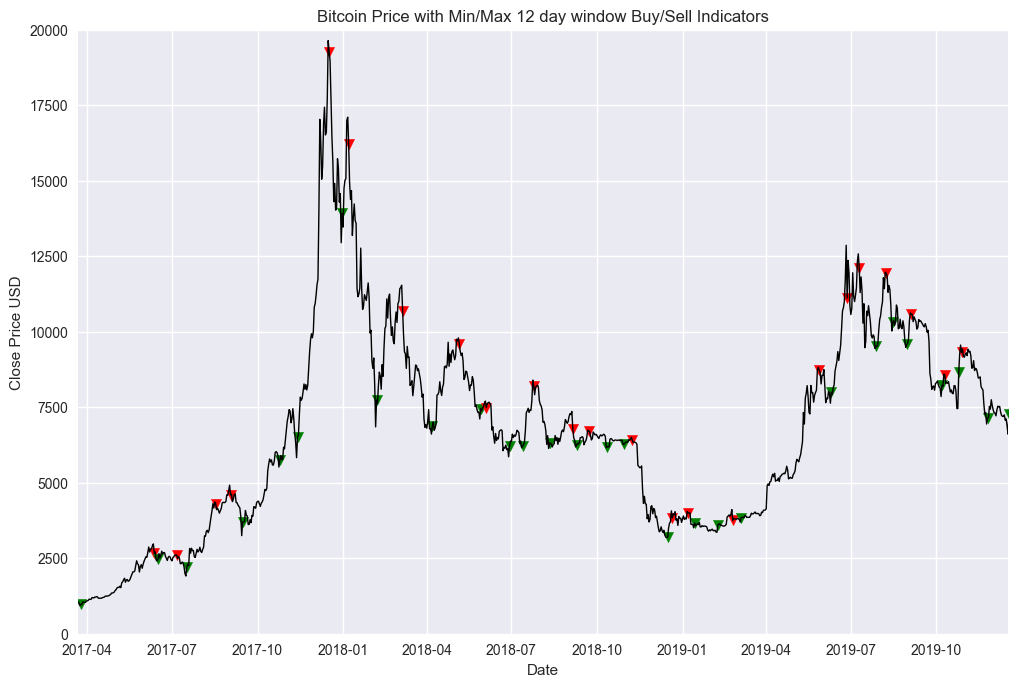

In [28]:
#Using matplotlib to add required columns
# turn this into a plotting function

fig = plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')


df_a['date'] = pd.to_datetime(df_a['date'])
plt.plot(df_a['date'], df_a['PriceUSD'],linewidth=1,color='black')


# label axis's
plt.xlabel('Date')  
plt.ylabel('Close Price USD')  
plt.title('Bitcoin Price with Min/Max 12 day window Buy/Sell Indicators') 

for i in range(0,len(btcUSD)):
    if buySellHold[i][0] == "BUY":
        plt.scatter(df_a['date'][i],df_a['PriceUSD'][i], label='skitscat', color='green', s=55, marker="v") #BUY
    if buySellHold[i][0] == "SELL":
        plt.scatter(df_a['date'][i],df_a['PriceUSD'][i], label='skitscat', color='red', s=55, marker="v") #SELL
        
   
plt.axis([df_a['date'][3000], df_a['date'][4000], 0, 20000])
#
plt.savefig('btc_buy_sell.png')